In [127]:
%matplotlib inline
import numpy as np
import scipy 
from scipy import ndimage
import matplotlib.pyplot as plt
from skimage import data, img_as_float, color
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral
from skimage.transform import rescale, resize, rotate, downscale_local_mean
import imageio
import cv2
demo_im = imageio.imread("./kodim23.png")
demo_im = resize(demo_im, (256, 256), anti_aliasing=True)
lab = color.rgb2lab(demo_im)
lab1 = color.rgb2gray(demo_im)
lab = lab[:,:,0]
blur = cv2.GaussianBlur(lab,(5,5),0)

(256, 256)
(256, 256)
[[-0.03464361 -0.03468542 -0.03487633 ... -0.01001638 -0.00643111
  -0.00565267]
 [-0.03498289 -0.03497339 -0.03509033 ... -0.01011727 -0.00707993
  -0.0053468 ]
 [-0.03506266 -0.03511713 -0.0351161  ... -0.0099598  -0.00697783
  -0.00552438]
 ...
 [-0.03633271 -0.03452625 -0.02645029 ... -0.01884841 -0.01991204
  -0.02170945]
 [-0.03438116 -0.03421365 -0.02822947 ... -0.0183035  -0.02077022
  -0.02086888]
 [-0.01032816 -0.00983262 -0.00541157 ...  0.00304613  0.00083926
   0.00129364]]


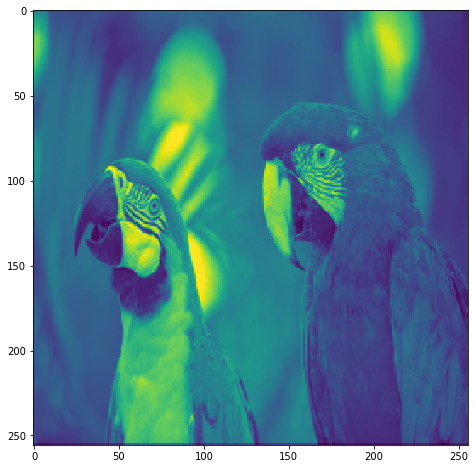

In [138]:
#lab = rotate(lab, -10)

plt.figure(figsize=(10, 8))
plt.imshow(lab1)
plt.axis('on')
print(np.shape(lab1))
print(np.shape(lab))
print(lab1-lab/100)

In [9]:
demo_im[0][0]

Array([116, 116,  88], dtype=uint8)

In [18]:
from PIL import Image 
im = Image.open("./kodim23.png")
m = min(im.size)
im1 = im.resize((m,m))
im1.size

(512, 512)

In [167]:
import imageio
import cv2
from skimage.transform import rescale, resize, downscale_local_mean
from skimage import data, img_as_float, color


def preprocessing(image,size = (256,256)):
    demo_im = resize(image, size, anti_aliasing=True)
    L = color.rgb2lab(demo_im)[:,:,0]
    blur = cv2.GaussianBlur(L,(5,5),0)
    return L


0.0


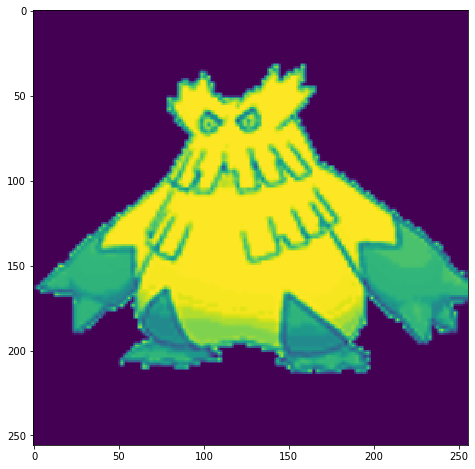

In [170]:
demo_im = imageio.imread("./pokemon-images-dataset-by-type-master/all/abomasnow.png")
demo_im = demo_im[:,:,:3]
demo_im = preprocessing(demo_im)


plt.figure(figsize=(10, 8))
plt.imshow(demo_im)
plt.axis('on')
print(demo_im[0][0])

In [27]:
path = "./pokemon-images-dataset-by-type-master/all"
make_dataset(path, size=1)

((Array([[[0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          ...,
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0]],
  
         [[0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          ...,
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0]],
  
         [[0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          ...,
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          ...,
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0]],
  
         [[0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          ...,
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0]],
  
         [[0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          ...,
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0]]], dtype=u

In [198]:
import os
from PIL import Image
import json
def make_dataset(path, size=None):
    """
    Загружает датасет с диска.
  
    Parameters
    ----------
    path : os.path
        относительный путь до директории с картинками. 
        в директории не должно быть вложенных директорий и посторонних файлов
    size : int
        максимально количество загружаемых картинок.
        если не указан, загружаются все картинки
  
    Returns
    -------
    dataset_ndarr : tuple of L-images (for our has-function)
    dataset_PIL: tuple of PIL instances (for imagehash functions)
  
    """
    if size == None:
        size = len(os.listdir(path))
    img_idx = 0
    dataset_ndarr = [None]*size
    dataset_PIL = [None]*size
    original  = [None]*size
    for name in os.listdir(path):
        if (size is not None) and (img_idx >= size):
            break
        
        full_name = os.path.join(path, name)
        image = data.imread(full_name)[:,:,:3]
        original[img_idx] = image
        image = preprocessing(image,(120,120))
        #image = resize(image, (256,256), anti_aliasing=True)
        
        string = []
        string.append(image)#0
        string.append(rotate(image, 0.25))#1
        string.append(rotate(image, 0.5))#2
        string.append(rotate(image, 0.75))#3
        string.append(rotate(image, 1))#4
        string.append(rotate(image, 1.25))#5
        string.append(rotate(image, 1.5))#6
        string.append(rotate(image, 1.75))#7
        string.append(rotate(image, 2))#8
        string.append(rotate(image, -2))#9
        string.append(rotate(image, 5))#10
        string.append(rotate(image, -5))#11
        string.append(rotate(image, 10))#12
        string.append(rotate(image, -10))#13
        string.append(rotate(image, 45))#14
        string.append(rotate(image, -45))#15
        string.append(rotate(image, 90))#16
        string.append(rotate(image, -90))#17
        #image = resize(image, (256,256),anti_aliasing=True)
        string.append(
            resize(image[64:193,64:193] , (256,256), anti_aliasing=True)
        )#18
        string.append(
            resize(image[32:224,32:224] , (256,256), anti_aliasing=True)
        )#19
        string.append(
            resize(image[16:240,16:240] , (256,256), anti_aliasing=True)
        )#20
        
        
        
        
        dataset_ndarr[img_idx] = string # можно переделать preprocessing(), чтобы он принимал PIL instances
        dataset_PIL[img_idx] = Image.open(full_name)
        img_idx += 1
        
    return dataset_ndarr, dataset_PIL, original

In [143]:
path = "./pokemon-images-dataset-by-type-master/all"
A,B = make_dataset(path, size=2)

demo_im = A[0][19]
demo_im2 = B[0]
plt.figure(figsize=(10, 8))
plt.imshow(demo_im2)
plt.axis('on')
print(np.shape(demo_im))

ValueError: too many values to unpack (expected 2)

In [192]:

path = "./pokemon-images-dataset-by-type-master/all"
A,B,O = make_dataset(path,100)


(100, 21, 120, 120)


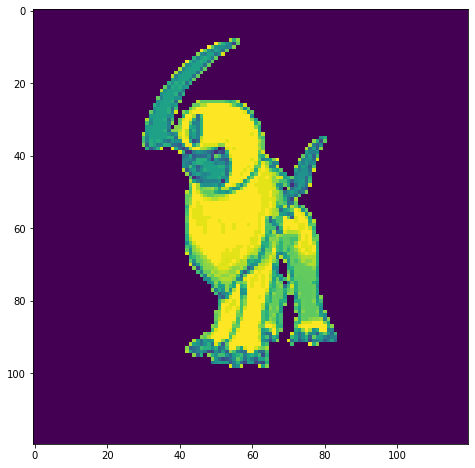

In [196]:
demo_im = A[2][0]
demo_im2 = O[0]
plt.figure(figsize=(10, 8))
plt.imshow(demo_im)
plt.axis('on')
print(np.shape(A))

In [197]:
import numpy as np
array = np.array(A)
from tempfile import TemporaryFile
outfile = TemporaryFile()
np.save('pokemon_L_120x120', array)